In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Agregación de datos x categoría

In [124]:
gender = ['male', 'female']
income = ['poor', 'middle', 'rich']

In [125]:
n = 500
gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [126]:
print(gender_data[1:6], income_data[1:6])

['female', 'male', 'female', 'male', 'female'] ['poor', 'middle', 'poor', 'rich', 'middle']


In [127]:
#fórmula: media + std * Z
height = 170 + 20 * np.random.randn(n) #distribución normal con media de 1.60 mts y std de 30 cms
weight = 75 + 15 * np.random.randn(n) #idem para el peso
age = 30 + 12 * np.random.rand(n) #edad
income = 18000 * 3500 * np.random.rand(n)

In [128]:
data = pd.DataFrame(
    {
        'gender':gender_data,
        'economic':income_data,
        'height':height,
        'weight':weight,
        'age':age,
        'income':income
    }
)

In [129]:
data['age'] = data['age'].astype(int)

In [130]:
data.describe(include='all')

,gender,economic,height,weight,age,income
count,500,500,500.000000,500.000000,500.000000,5.000000e+02
unique,2,3,NaN,NaN,NaN,NaN
top,male,poor,NaN,NaN,NaN,NaN
freq,264,168,NaN,NaN,NaN,NaN
mean,NaN,NaN,170.045442,75.248620,35.136000,3.049054e+07
std,NaN,NaN,20.025912,14.462406,3.341232,1.806173e+07
min,NaN,NaN,112.496659,29.221445,30.000000,9.540996e+04
25%,NaN,NaN,156.437966,65.753013,32.000000,1.502460e+07
50%,NaN,NaN,168.794226,75.251416,35.000000,2.982927e+07
75%,NaN,NaN,183.461341,84.480488,38.000000,4.498063e+07


## agrupación

In [131]:
group_gender = data.groupby("gender")
group_gender.groups

{'female': Int64Index([  1,   3,   5,   6,   7,   8,  12,  14,  15,  19,
             ...
             479, 480, 481, 482, 483, 484, 489, 490, 491, 498],
            dtype='int64', length=236),
 'male': Int64Index([  0,   2,   4,   9,  10,  11,  13,  16,  17,  18,
             ...
             486, 487, 488, 492, 493, 494, 495, 496, 497, 499],
            dtype='int64', length=264)}

In [132]:
#recorrer el agrupamiento:
for name, group in group_gender:
    print("nombre: ", name, "grupo: ", group)    

nombre:  female grupo:       gender economic      height      weight  age        income
1    female     poor  195.508751   67.355817   33  3.612345e+07
3    female     poor  164.494760   76.166388   40  3.071571e+07
5    female   middle  142.160393  104.857246   36  3.701086e+07
6    female     poor  170.551820   62.582562   40  4.700101e+07
7    female     poor  213.359755   68.892774   34  3.607733e+07
..      ...      ...         ...         ...  ...           ...
484  female     rich  137.343520   49.452062   32  2.897672e+07
489  female   middle  167.457031   66.578379   36  5.319260e+07
490  female   middle  151.146749   70.860725   38  6.000192e+07
491  female   middle  136.360000  101.347080   37  5.967176e+07
498  female     poor  199.057028   74.063150   38  5.368303e+07

[236 rows x 6 columns]
nombre:  male grupo:      gender economic      height      weight  age        income
0     male   middle  163.510782   61.348133   32  3.246433e+07
2     male   middle  182.995219   74

In [133]:
#mostrar el agrupamiento de otra forma:
group_gender.get_group('male')

,gender,economic,height,weight,age,income
0,male,middle,163.510782,61.348133,32,3.246433e+07
2,male,middle,182.995219,74.823233,40,2.840854e+07
4,male,rich,147.679172,57.599069,32,2.579156e+07
9,male,rich,154.096820,92.939731,33,2.435850e+07
10,male,middle,205.486484,48.660349,31,2.320740e+07
...,...,...,...,...,...,...
494,male,middle,169.060792,97.097491,33,4.004045e+07
495,male,rich,183.762226,51.484507,35,6.206068e+06
496,male,rich,137.200088,93.210308,38,1.648411e+06
497,male,rich,182.385447,55.798446,41,3.971486e+07


## agrupo por dos campos

In [134]:
double_group = data.groupby(['gender', 'economic'])
len(double_group) #arroja 6: 2 categorías gender y 3 categorias economic

6

In [135]:
#recorrer el agrupamiento:
for name, group in double_group:
    print("nombre: ", name, "grupo: ", group)    

nombre:  ('female', 'middle') grupo:       gender economic      height      weight  age        income
5    female   middle  142.160393  104.857246   36  3.701086e+07
15   female   middle  152.353095   64.166959   32  2.503848e+06
20   female   middle  210.395040   81.209408   34  3.120686e+07
26   female   middle  192.491661   80.167970   32  4.977807e+07
27   female   middle  155.580781   75.796507   32  2.930138e+07
..      ...      ...         ...         ...  ...           ...
482  female   middle  184.267400   89.212459   34  5.971957e+07
483  female   middle  147.291368   66.047344   38  5.687829e+07
489  female   middle  167.457031   66.578379   36  5.319260e+07
490  female   middle  151.146749   70.860725   38  6.000192e+07
491  female   middle  136.360000  101.347080   37  5.967176e+07

[74 rows x 6 columns]
nombre:  ('female', 'poor') grupo:       gender economic      height     weight  age        income
1    female     poor  195.508751  67.355817   33  3.612345e+07
3    fema

## tomo dos "sub_grupos": a los hombres ricos:

In [136]:
double_group.get_group(('male', 'rich'))

,gender,economic,height,weight,age,income
4,male,rich,147.679172,57.599069,32,2.579156e+07
9,male,rich,154.096820,92.939731,33,2.435850e+07
18,male,rich,173.056926,75.160660,32,2.595642e+07
22,male,rich,131.172722,74.858885,38,5.827924e+06
25,male,rich,144.833208,75.075287,30,2.702144e+06
...,...,...,...,...,...,...
485,male,rich,186.667343,95.890570,36,2.666043e+07
493,male,rich,181.292353,71.120901,36,4.698988e+07
495,male,rich,183.762226,51.484507,35,6.206068e+06
496,male,rich,137.200088,93.210308,38,1.648411e+06


## mujeres de clase media

In [137]:
double_group.get_group(('female', 'middle'))

,gender,economic,height,weight,age,income
5,female,middle,142.160393,104.857246,36,3.701086e+07
15,female,middle,152.353095,64.166959,32,2.503848e+06
20,female,middle,210.395040,81.209408,34,3.120686e+07
26,female,middle,192.491661,80.167970,32,4.977807e+07
27,female,middle,155.580781,75.796507,32,2.930138e+07
...,...,...,...,...,...,...
482,female,middle,184.267400,89.212459,34,5.971957e+07
483,female,middle,147.291368,66.047344,38,5.687829e+07
489,female,middle,167.457031,66.578379,36,5.319260e+07
490,female,middle,151.146749,70.860725,38,6.000192e+07


## funciones sobre los grupos

In [138]:
double_group.sum()

height       weight   age        income
gender economic                                               
female middle    12507.619683  5520.879886  2538  2.510351e+09
       poor      15887.954249  7083.355694  3248  2.706491e+09
       rich      11596.934152  5242.643362  2438  2.024021e+09
male   middle    15805.243237  6953.401197  3303  2.661470e+09
       poor      12703.514440  5477.653592  2624  2.382556e+09
       rich      16521.455026  7346.376351  3417  2.960383e+09

In [139]:
double_group.count()

height  weight  age  income
gender economic                             
female middle        74      74   74      74
       poor          93      93   93      93
       rich          69      69   69      69
male   middle        93      93   93      93
       poor          75      75   75      75
       rich          96      96   96      96

In [140]:
double_group.size()

gender  economic
female  middle      74
        poor        93
        rich        69
male    middle      93
        poor        75
        rich        96
dtype: int64

In [141]:
double_group.describe()

height                                                 \
                 count        mean        std         min         25%   
gender economic                                                         
female middle     74.0  169.021888  17.725131  136.311573  155.651300   
       poor       93.0  170.838218  21.271686  117.921532  159.976977   
       rich       69.0  168.071509  19.074370  130.894441  155.165218   
male   middle     93.0  169.948852  21.470037  112.496659  157.690535   
       poor       75.0  169.380193  18.848876  128.581250  157.708638   
       rich       96.0  172.098490  20.842879  127.383201  154.913202   

                                                    weight             ...  \
                        50%         75%         max  count       mean  ...   
gender economic                                                        ...   
female middle    166.941570  178.317223  216.311336   74.0  74.606485  ...   
       poor      170.070998  183.418395  227.088829   93.0  76.165115  ...   
       rich      167.108748  178.582810  221.675724   69.0  75.980339  ...   
male   middle    166.275919  183.719367  215.636553   93.0  74.767755  ...   
       poor      169.329155  178.450558  209.846669   75.0  73.035381  ...   
       rich      171.911003  187.337457  220.186319   96.0  76.524754  ...   

                   age       income                              \
                   75%   max  count          mean           std   
gender economic                                                   
female middle    37.00  41.0   74.0  3.392366e+07  1.908642e+07   
       poor      38.00  41.0   93.0  2.910206e+07  1.724493e+07   
       rich      38.00  41.0   69.0  2.933364e+07  1.684440e+07   
male   middle    39.00  41.0   93.0  2.861795e+07  1.869300e+07   
       poor      38.00  41.0   75.0  3.176742e+07  1.829841e+07   
       rich      38.25  41.0   96.0  3.083732e+07  1.806749e+07   

                                                                          \
                           min           25%           50%           75%   
gender economic                                                            
female middle    542918.350048  1.631392e+07  3.402439e+07  5.139905e+07   
       poor      304503.970161  1.446373e+07  3.052283e+07  4.358247e+07   
       rich      555853.874909  1.768761e+07  2.624551e+07  4.135735e+07   
male   middle    198859.212176  1.026187e+07  2.767479e+07  4.195736e+07   
       poor       95409.962267  1.589964e+07  3.241075e+07  4.606054e+07   
       rich      863507.434880  1.496093e+07  2.795723e+07  4.650388e+07   

                               
                          max  
gender economic                
female middle    6.237992e+07  
       poor      6.150693e+07  
       rich      6.211225e+07  
male   middle    6.226090e+07  
       poor      6.168769e+07  
       rich      6.270731e+07  

[6 rows x 32 columns]

## describe() de un solo grupo

In [142]:
double_group['income'].describe()

count          mean           std            min  \
gender economic                                                     
female middle     74.0  3.392366e+07  1.908642e+07  542918.350048   
       poor       93.0  2.910206e+07  1.724493e+07  304503.970161   
       rich       69.0  2.933364e+07  1.684440e+07  555853.874909   
male   middle     93.0  2.861795e+07  1.869300e+07  198859.212176   
       poor       75.0  3.176742e+07  1.829841e+07   95409.962267   
       rich       96.0  3.083732e+07  1.806749e+07  863507.434880   

                          25%           50%           75%           max  
gender economic                                                          
female middle    1.631392e+07  3.402439e+07  5.139905e+07  6.237992e+07  
       poor      1.446373e+07  3.052283e+07  4.358247e+07  6.150693e+07  
       rich      1.768761e+07  2.624551e+07  4.135735e+07  6.211225e+07  
male   middle    1.026187e+07  2.767479e+07  4.195736e+07  6.226090e+07  
       poor      1.589964e+07  3.241075e+07  4.606054e+07  6.168769e+07  
       rich      1.496093e+07  2.795723e+07  4.650388e+07  6.270731e+07

In [143]:
double_group['gender'].describe()

count unique     top freq
gender economic                          
female middle      74      1  female   74
       poor        93      1  female   93
       rich        69      1  female   69
male   middle      93      1    male   93
       poor        75      1    male   75
       rich        96      1    male   96

## con `aggregate` creo columnas con otros datos:

In [144]:
double_group.aggregate(
    {
        'age':np.sum,
        'income':np.std,
    }
)

age        income
gender economic                    
female middle    2538  1.908642e+07
       poor      3248  1.724493e+07
       rich      2438  1.684440e+07
male   middle    3303  1.869300e+07
       poor      2624  1.829841e+07
       rich      3417  1.806749e+07

In [145]:
double_group.aggregate(
    {
        'age':np.mean,
        'income': lambda i: np.mean(i)/np.std(i)
    }
)

age    income
gender economic                     
female middle    34.297297  1.789504
       poor      34.924731  1.696718
       rich      35.333333  1.754205
male   middle    35.516129  1.539243
       poor      34.986667  1.747766
       rich      35.593750  1.715745

## otra forma de colocar funciones dentro de los grupos

In [146]:
double_group.aggregate([np.sum, np.mean, np.median, np.std])

height                                          weight  \
                          sum        mean      median        std          sum   
gender economic                                                                 
female middle    12507.619683  169.021888  166.941570  17.725131  5520.879886   
       poor      15887.954249  170.838218  170.070998  21.271686  7083.355694   
       rich      11596.934152  168.071509  167.108748  19.074370  5242.643362   
male   middle    15805.243237  169.948852  166.275919  21.470037  6953.401197   
       poor      12703.514440  169.380193  169.329155  18.848876  5477.653592   
       rich      16521.455026  172.098490  171.911003  20.842879  7346.376351   

                                                   age                    \
                      mean     median        std   sum       mean median   
gender economic                                                            
female middle    74.606485  73.010988  13.230745  2538  34.297297     34   
       poor      76.165115  75.931700  14.981758  3248  34.924731     35   
       rich      75.980339  77.805984  16.265844  2438  35.333333     35   
male   middle    74.767755  74.823233  15.669083  3303  35.516129     35   
       poor      73.035381  73.044849  12.663007  2624  34.986667     35   
       rich      76.524754  76.314918  13.690932  3417  35.593750     36   

                                 income                              \
                      std           sum          mean        median   
gender economic                                                       
female middle    3.077669  2.510351e+09  3.392366e+07  3.402439e+07   
       poor      3.385508  2.706491e+09  2.910206e+07  3.052283e+07   
       rich      3.363588  2.024021e+09  2.933364e+07  2.624551e+07   
male   middle    3.456603  2.661470e+09  2.861795e+07  2.767479e+07   
       poor      3.240343  2.382556e+09  3.176742e+07  3.241075e+07   
       rich      3.379748  2.960383e+09  3.083732e+07  2.795723e+07   

                               
                          std  
gender economic                
female middle    1.908642e+07  
       poor      1.724493e+07  
       rich      1.684440e+07  
male   middle    1.869300e+07  
       poor      1.829841e+07  
       rich      1.806749e+07

## uso de `lambda`

In [147]:
double_group.aggregate(lambda x: np.mean(x)/np.std(x))

height    weight        age    income
gender economic                                         
female middle    9.600811  5.677364  11.219988  1.789504
       poor      8.074780  5.111412  10.371863  1.696718
       rich      8.875932  4.705380  10.581613  1.754205
male   middle    7.958533  4.797537  10.330555  1.539243
       poor      9.046736  5.806457  10.869922  1.747766
       rich      8.300288  5.618789  10.586764  1.715745

## de la forma clásica:

In [148]:
df = pd.DataFrame({'categ': [1, 2, 1, 1, 2, 1], 
                   'produ': ['a', 'b', 'c', 'b', 'a', 'a'], 
                   'venta': [6, 2, 1, 4, 5, 2]})

In [149]:
df.groupby('categ').sum()

,venta
categ,
1,13
2,7


In [150]:
df.groupby(['categ', 'produ']).count()

venta
categ produ       
1     a          2
      b          1
      c          1
2     a          1
      b          1

In [151]:
df.groupby(['categ','produ']).agg(['count', 'mean'])

venta     
            count mean
categ produ           
1     a         2    4
      b         1    4
      c         1    1
2     a         1    5
      b         1    2

### para agrupar por índice:

In [152]:
df.groupby(level=0).mean()

,categ,venta
0,1,6
1,2,2
2,1,1
3,1,4
4,2,5
5,1,2


In [153]:
csv = pd.DataFrame({'2016-01':[1,2,1], '2016-02':[0,0,1], '2016-03':[1,1,2], 
                       '2016-04':[0,0,0], '2016-05':[0,0,1], '2016-06':[0,0,0]})
csv

,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06
0,1,0,1,0,0,0
1,2,0,1,0,0,0
2,1,1,2,0,1,0


In [154]:
csv.groupby(pd.PeriodIndex(csv.columns, freq='Q'), axis=1).mean()

,2016Q1,2016Q2
0,0.666667,0.000000
1,1.000000,0.000000
2,1.333333,0.333333


## Transformación:

In [155]:
zscore = lambda x: (x - x.mean()) / x.std()

In [158]:
trans = double_group[['age', 'income']].transform(zscore)

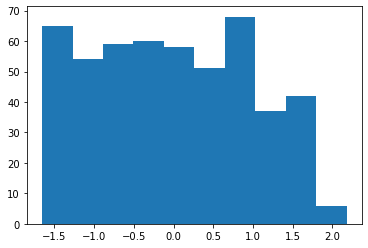

In [159]:
plt.hist(trans['age'])
plt.show()

In [162]:
#reemplazo los NaN con una labmda (colocando el promedio)
fill_na_mean = lambda x: x.fillna(x.mean())

In [163]:
trans.transform(fill_na_mean)

,age,income
0,-1.017221,0.205765
1,-0.568521,0.407157
2,1.297190,-0.011203
3,1.499116,0.093572
4,-1.063319,-0.279273
...,...,...
495,-0.175679,-1.363292
496,0.711961,-1.615549
497,1.599601,0.491355
498,0.908363,1.425402


### mostrar las primeras filas de cada grupo:

In [175]:
double_group.head(1)

,gender,economic,height,weight,age,income
0,male,middle,163.510782,61.348133,32,3.246433e+07
1,female,poor,195.508751,67.355817,33,3.612345e+07
4,male,rich,147.679172,57.599069,32,2.579156e+07
5,female,middle,142.160393,104.857246,36,3.701086e+07
11,male,poor,181.682799,30.514059,32,5.730805e+07
12,female,rich,196.199954,64.749948,40,8.276116e+06


In [178]:
#la enésima fila de cada grupo
double_group.nth(32)

height     weight  age        income
gender economic                                          
female middle    154.967145  64.507600   35  2.431782e+07
       poor      187.273898  82.336898   37  3.027716e+07
       rich      146.615088  61.372499   30  5.224807e+07
male   middle    186.811825  57.641707   32  3.478042e+07
       poor      153.434286  52.534546   36  4.015545e+07
       rich      194.792717  64.347101   35  1.236150e+07